In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


### Import lib

In [ ]:
import requests
import imutils
import cv2
from PIL import Image
from skimage.metrics import structural_similarity

In [ ]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In [ ]:
print("Original image format : ",original.format)
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size)
print("Tampered image size : ",tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


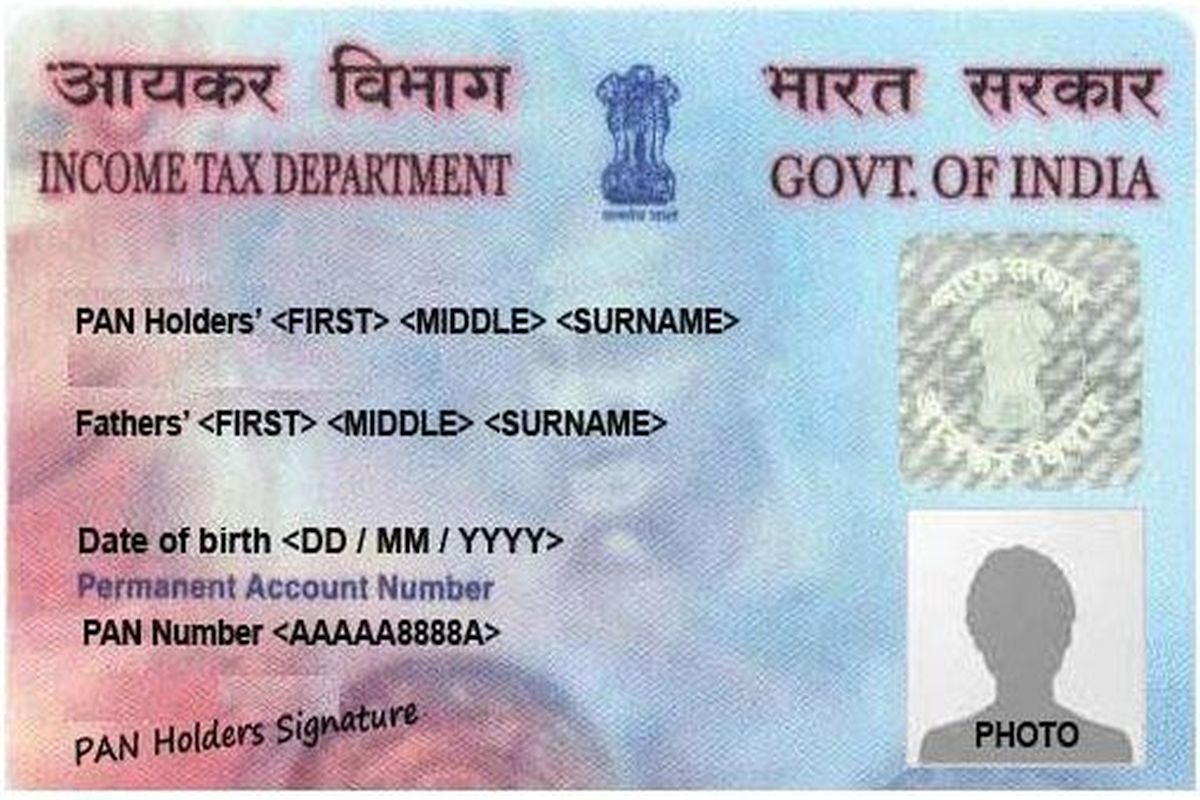

In [ ]:
original

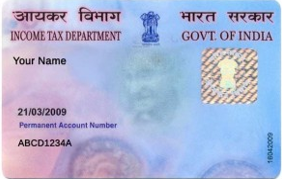

In [ ]:
tampered

In [ ]:
original = original.resize((250, 170))
original.save('pan_card_tampering/image/original_resize.png')
print(original.size)
tampered = tampered.resize((250, 170))
tampered.save('pan_card_tampering/image/tampered_resize.png')
print(tampered.size)

(250, 170)
(250, 170)


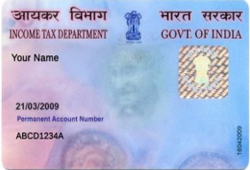

In [ ]:
tampered

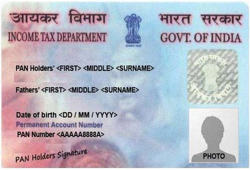

In [ ]:
original

In [ ]:
original_pic = cv2.imread('pan_card_tampering/image/original_resize.png')
tampered_pic = cv2.imread('pan_card_tampering/image/tampered_resize.png')

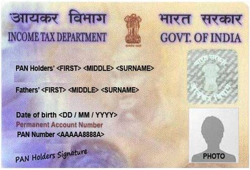

In [ ]:
Image.fromarray(original_pic)

In [ ]:
original_gray = cv2.cvtColor(original_pic, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered_pic, cv2.COLOR_BGR2GRAY)

In [ ]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.320363535615328


In [ ]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
cnts[1]

array([[[136, 167]],

       [[177, 167]]], dtype=int32)

In [ ]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original_pic, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered_pic, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


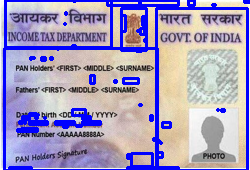

In [ ]:
print('Original Format Image')
Image.fromarray(original_pic)

Tampered Image


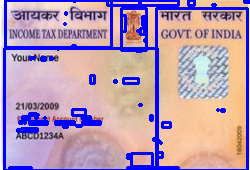

In [ ]:
print('Tampered Image')
Image.fromarray(tampered_pic)

Different Image


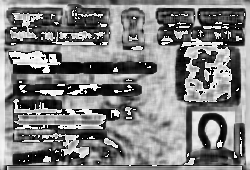

In [ ]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


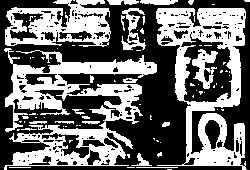

In [ ]:
print('Threshold Image')
Image.fromarray(thresh)